<a href="https://colab.research.google.com/github/CatTaborEP/ProjectMLUTEP/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will make use of data provided by commonlit.org.  The goal of this project is to utilize machine learning techniques to find a more representitve number for lexile scores to more accurately match the level of materials to that which was provided by educators.  The data set can be found at https://www.commonlit.org/blog/introducing-the-clear-corpus-an-open-dataset-to-advance-research-28ff8cfea84a/ and is open source and specifically provided for research purposes.  

In [50]:
# Import necessary packages here.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [3]:
#import data as a dataframe
def load_dataset(filename):
  return pd.read_csv(filename)


In [32]:
X = load_dataset('lexile.csv')
a =X.columns
#define a label
Y = X['BT Easiness']
#drop unecessary columns (including the ) and label to create a new dataset to work with.
newX =X.drop(['Last Changed', 'Author','Title','MPAA\nMax','British Words',
       'MPAA \n#Max', 'Anthology','URL','Source','Pub Year','Category','Location','License','Excerpt','BT Easiness','firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred','Kaggle split'], axis='columns')
print ('Max of BT easiness: ', Y.max())
print ('Min of BT easiness: ', Y.min())
#separate into test and training sets.
#60/40 split
#training data contains 2834 records.
x_train, x_test, y_train, y_test = train_test_split(newX, Y, test_size=0.4, random_state=17)



Max of BT easiness:  1.711389827
Min of BT easiness:  -3.676267773


In [42]:
#Apply KNN regression


In [44]:
#complete a linear regression
linear = LinearRegression()
reg = linear.fit(features_train,accuracy_train)
print(reg.score(features_train,accuracy_train))
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))
print(regr.coef_)
print(regr.intercept_)

0.48638685414711835
[-4.81457871e-05 -3.46586670e-02 -4.15732632e-03 -9.16457063e-03
 -1.21816348e-01  1.01888221e-01 -1.06857758e-01  3.97705182e-02
 -1.79816397e+00 -3.58366102e-02 -3.05489085e-01  1.71505262e-01
 -7.55007091e-02 -1.01281192e-01  3.96192740e+00 -7.16969300e+00
  1.94792325e-02  3.78104264e-02]
7.4651454704731695


In [45]:
pred_accuracy = regr.predict(x_train)
mse = ((pred_accuracy-y_train)**2).sum()/len(pred_accuracy)
print("Training MSE:", mse)

Training MSE: 0.5176959455365525


In [48]:
pred_accuracy_test = regr.predict(x_test)
mse = ((pred_accuracy_test-y_test)**2).sum()/len(pred_accuracy_test)
print("Testing MSE:", mse)

Testing MSE: 0.5435052319165867


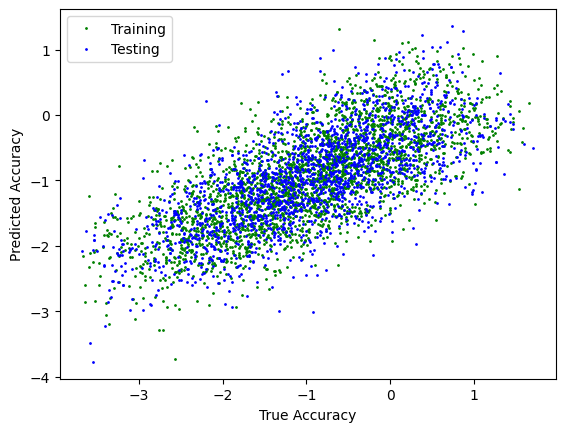

In [51]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y_train,pred_accuracy,'go',markersize=1,label="Training")
plt.plot(y_test,pred_accuracy_test,'bo',markersize=1,label="Testing")
plt.xlabel("True Accuracy")
plt.ylabel("Predicted Accuracy")
plt.legend()
plt.show()
